# Classification and Regression, Part 1 - Exercise Solution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Exercise 1. Univariate Classification

---

### About the data

---
The dataset you will use for today exercise is a modified version of Computers https://www.timeseriesclassification.com/description.php?Dataset=Computers

These problems were taken from data recorded as part of government sponsored study called Powering the Nation. The intention was to collect behavioural data about how consumers use electricity within the home to help reduce the UK's carbon footprint. The data contains readings from 251 households, sampled in two-minute intervals over a month. Each series is length 720 (24 hours of readings taken every 2 minutes). Classes are Desktop and Laptop.



---

### Read the data

Load the numpy files X_train_computers.npy, X_test_computers.npy, y_train_computers.npy, y_test_computers.npy


In [2]:
X_train = np.load('data/X_train_computers.npy')
X_test = np.load('data/X_test_computers.npy')
y_train = np.load('data/y_train_computers.npy')
y_test = np.load('data/y_test_computers.npy')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((251, 1, 720), (250, 1, 720), (251,), (250,))

---

## Data Understanding/Preparation

Try to understand the data first... Plot some of the data, what do you see? Ask yourself a few questions:
- How many classes are there? Are the classes balanced?
- Are there any missing values?
- Are there outlier values? (hint: make a boxplot of all the data)

---

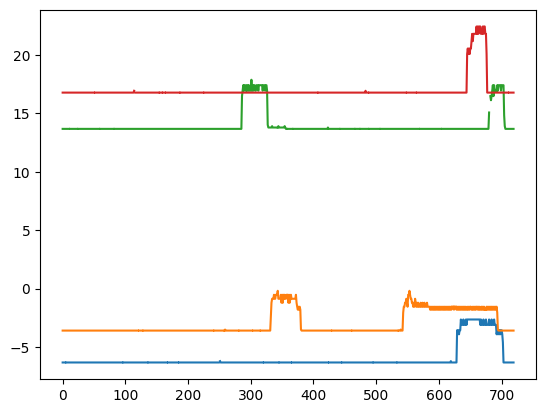

In [3]:
plt.plot(X_train[0, 0, :])
plt.plot(X_train[1, 0, :])
plt.plot(X_train[2, 0, :])
plt.plot(X_train[3, 0, :])

#### How many classes are there? Are the classes balanced?

In [4]:
np.unique(y_train, return_counts=True)

(array(['1', '2'], dtype='<U21'), array([126, 125]))

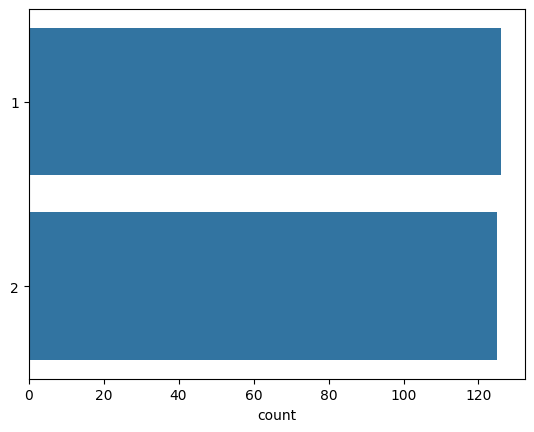

In [5]:
sns.countplot(y_train)
plt.show()

In [6]:
np.unique(y_test, return_counts=True)

(array(['1', '2'], dtype='<U1'), array([125, 125]))

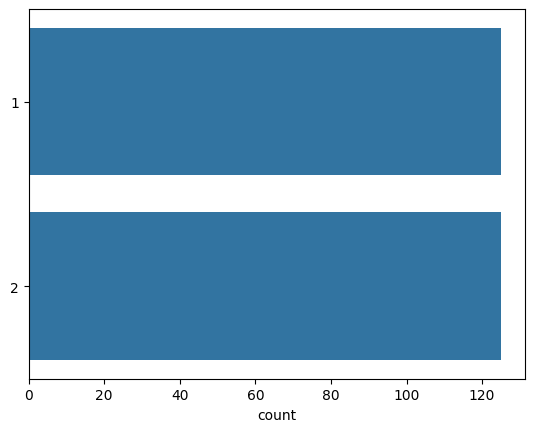

In [7]:
sns.countplot(y_test)
plt.show()

#### Are there any missing values?

In [8]:
np.isnan(X_train).sum()

np.int64(3582)

In [9]:
np.isnan(X_test).ravel().sum()

np.int64(3597)

In [10]:
missing_positions = np.argwhere(np.isnan(X_train[0,0]))

In [11]:
missing_positions

array([[  5],
       [ 96],
       [136],
       [167],
       [185],
       [250],
       [320],
       [345],
       [365],
       [424],
       [445],
       [495],
       [533]])

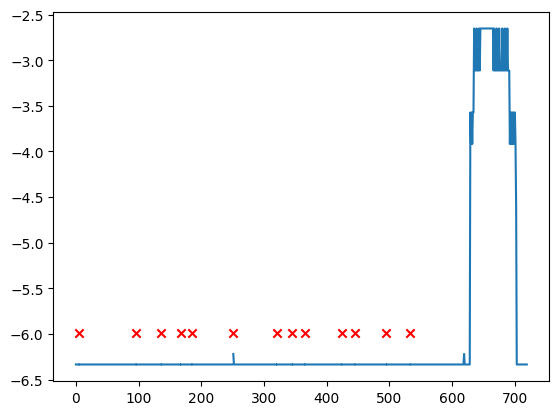

In [12]:
plt.plot(X_train[0,0])
plt.scatter(missing_positions, np.repeat(np.nanmean(X_train[0,0]), len(missing_positions)), color='red', marker='x')
plt.show()

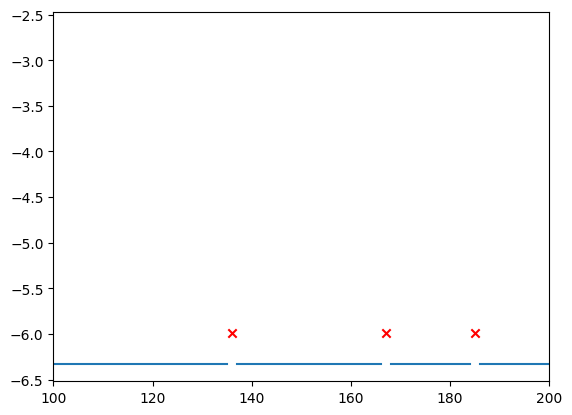

In [13]:
plt.plot(X_train[0,0])
plt.scatter(missing_positions, np.repeat(np.nanmean(X_train[0,0]), len(missing_positions)), color='red', marker='x')
plt.xlim(100, 200)
plt.show()

#### Are there any outlier values?

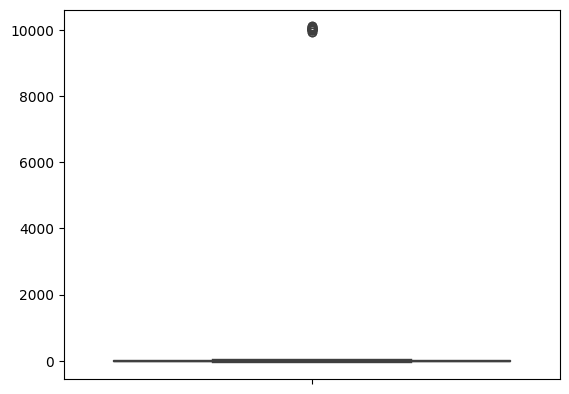

In [14]:
# global boxplot
sns.boxplot(X_train.ravel())
plt.show()
# hard to read

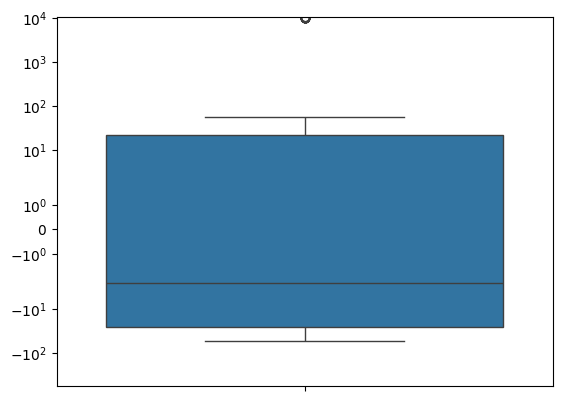

In [15]:
# global boxplot
sns.boxplot(X_train.ravel())
plt.yscale("symlog")
plt.show()
# there majority of data is around -100 and 100, but there are some outliers on the 10000 range

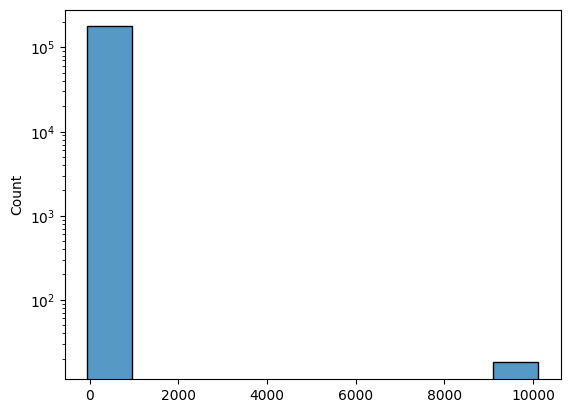

In [16]:
sns.histplot(X_train.ravel(), bins=10)
plt.yscale("log")

In [17]:
outliers_train = np.argwhere(np.abs(X_train) > 8000)
outliers_train

array([[  5,   0, 463],
       [  9,   0, 497],
       [ 25,   0, 630],
       [ 37,   0,  12],
       [ 38,   0, 102],
       [ 43,   0, 590],
       [ 83,   0, 198],
       [109,   0, 289],
       [116,   0,  50],
       [121,   0, 599],
       [127,   0, 316],
       [181,   0, 477],
       [190,   0, 340],
       [200,   0, 280],
       [208,   0,  38],
       [212,   0, 416],
       [217,   0, 357],
       [225,   0, 563]])

In [18]:
outliers_test = np.argwhere(np.abs(X_test) > 8000)
outliers_test

array([[  8,   0,  47],
       [ 15,   0, 577],
       [ 22,   0,  89],
       [ 48,   0, 477],
       [ 86,   0, 413],
       [111,   0,  83],
       [201,   0,  46],
       [232,   0, 542],
       [249,   0, 555]])

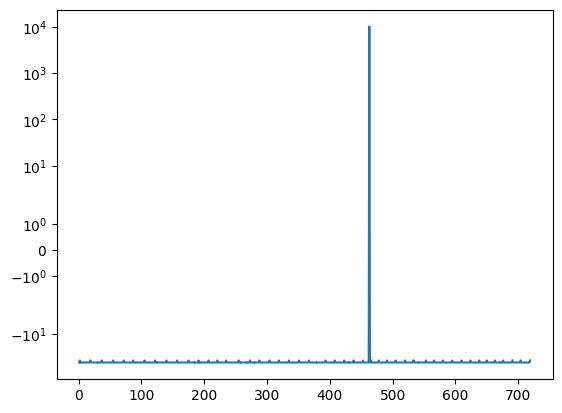

In [19]:
plt.plot(X_train[5,0])
plt.yscale("symlog")
plt.show()

---

#### Deal with the problems you found in the previous step. E.g., remove missing values, remove outliers, etc.

In [20]:
from sktime.transformations.series.impute import Imputer

In [21]:
X_train_no_out = X_train.copy()
X_test_no_out = X_test.copy()

In [22]:
# treat outliers as missing values
X_train_no_out[X_train > 8000] = np.nan
X_test_no_out[X_test > 8000] = np.nan

In [23]:
# replace missing values
imputer = Imputer(method="drift")

In [24]:
# the imputer is instance-wise, so it is ok to fit_transform also the test set (there is no data leakage)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.fit_transform(X_test)

In [25]:
# check if there are still missing values
np.isnan(X_train_imputed).ravel().sum(), np.isnan(X_test_imputed).ravel().sum()

(np.int64(0), np.int64(0))

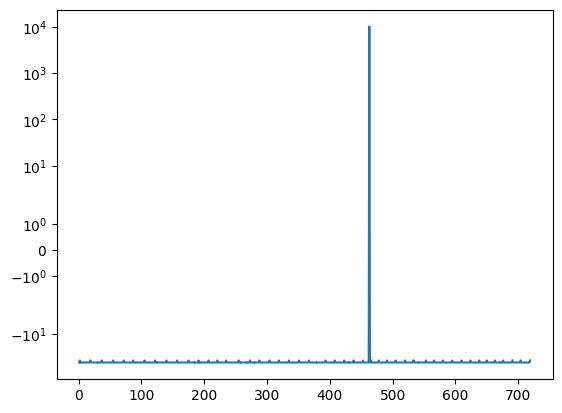

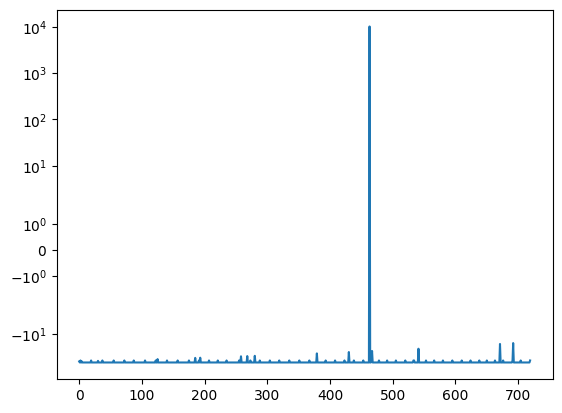

In [26]:
plt.plot(X_train[5,0])
plt.yscale("symlog")
plt.show()

plt.plot(X_train_imputed[5,0])
plt.yscale("symlog")
plt.show()

---

## Classification
After you removed the main problems in the data, you can start the classification process.
Does the dataset need further preprocessing (normalization maybe)? If so, do it. Use the LabelEncoder to transform the target variable in a numerical format.

### Goal
Your goal here is to find the best possible classification pipeline to predict the class of the computers dataset. You can use any classifier you saw in the course up to now.

### Hyperparameter tuning
Try to find the best hyperparameters for your model. You can a validation set, cross validation or a GridSearchCV or RandomizedSearchCV for this task.

### Evaluation
Don't overfit the test set! Only once you think you found the best model, test performance on the test set. Find the model that has the highest ROC AUC score.

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### Normalization

In [31]:
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = TabularToSeriesAdaptor(StandardScaler(), fit_in_transform=True)

In [33]:
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

### How does a dummy classifier perform?

In [34]:
from sktime.classification.dummy import DummyClassifier

In [35]:
dummy = DummyClassifier()

In [36]:
cross_val_score(dummy, X_train_scaled, y_train_encoded, cv=5, scoring="roc_auc").mean()

np.float64(0.5)

### Let's start with an euclidean KNN baseline

In [37]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [38]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="euclidean")

In [39]:
cross_val_score(knn, X_train_scaled, y_train_encoded, cv=10, scoring="roc_auc").mean()
# only slighly better than dummy

np.float64(0.5419871794871796)

### Is normalization helping?

In [40]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=1, distance="euclidean")

In [41]:
cross_val_score(knn, X_train_imputed, y_train_encoded, cv=10, scoring="roc_auc").mean()
# yes, it is helping, so let's keep it

np.float64(0.475)

### Lets perform a small fine-tuning

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid = {
    "n_neighbors": [1, 3, 5, 7, 9],
    "distance": ["euclidean"]
}

In [44]:
grid_search = GridSearchCV(KNeighborsTimeSeriesClassifier(), param_grid, cv=5, scoring="roc_auc")

In [45]:
grid_search.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5, estimator=KNeighborsTimeSeriesClassifier(),
             param_grid={'distance': ['euclidean'],
                         'n_neighbors': [1, 3, 5, 7, 9]},
             scoring='roc_auc')

In [46]:
grid_search.best_params_

{'distance': 'euclidean', 'n_neighbors': 5}

In [47]:
grid_search.best_score_

np.float64(0.5610892307692308)

### Let's try a dtw KNN

In [48]:
knn = KNeighborsTimeSeriesClassifier(n_neighbors=5, distance="dtw", distance_params={"window": 0.1})

In [49]:
%%time
cross_val_score(knn, X_train_scaled, y_train_encoded, cv=5, scoring="roc_auc").mean()
# dtw is better, but also slower

CPU times: user 1min 1s, sys: 29.8 ms, total: 1min 1s
Wall time: 1min 1s


np.float64(0.6480123076923077)

### Weasel

In [50]:
from sktime.classification.dictionary_based import WEASEL

In [51]:
weasel = WEASEL(support_probabilities=True)

In [52]:
%%time
cross_val_score(weasel, X_train_scaled, y_train_encoded, cv=5, scoring="roc_auc").mean()

CPU times: user 49.9 s, sys: 2.59 s, total: 52.5 s
Wall time: 31.6 s


np.float64(0.7087261538461539)

### PCA + Random Forest

In [53]:
from sktime.transformations.panel.reduce import Tabularizer
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [54]:
pca = PCA(200)

In [55]:
pca.fit(X_train_scaled[:, 0, :])

PCA(n_components=200)

Text(0, 0.5, 'cumulative explained variance')

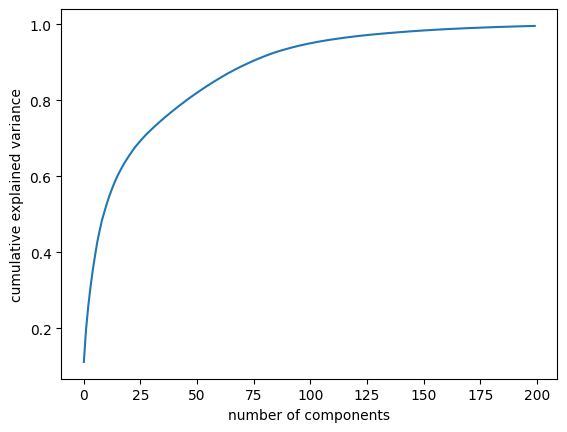

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [57]:
pipe = Tabularizer() * PCA(100) * RandomForestClassifier()

In [58]:
cross_val_score(pipe, X_train_scaled, y_train_encoded, cv=5, scoring="roc_auc").mean()

/home/giuseppe/pmts/pmts_env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/giuseppe/pmts/pmts_env/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/home/giuseppe/pmts/pmts_env/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home/giuseppe/pmts/pmts_env/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/home/giuseppe/pmts/pmts_env/lib/python3.12/site-packages/sklearn/utils/_response.py", line 214, in _get_response_values
    y_pred = prediction_method(X)
             ^^^^^^^^^^^^^^^^^^^^
  File "/

np.float64(nan)

### Feature Extraction

In [59]:
from sktime.transformations.panel.catch22 import Catch22

In [60]:
pipe = Catch22() * RandomForestClassifier()

In [61]:
cross_val_score(pipe, X_train_scaled, y_train_encoded, cv=5, scoring="roc_auc").mean()

np.float64(0.7964553846153846)

#### hyperparameter tuning

In [62]:
param_grid = {
    "catch22__catch24": [True, False],
    "randomforestclassifier__n_estimators": [10, 50, 100, 200]
}

In [63]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring="roc_auc")

In [64]:
grid_search.fit(X_train_scaled, y_train_encoded)

GridSearchCV(cv=5,
             estimator=SklearnClassifierPipeline(classifier=RandomForestClassifier(),
                          transformers=[Catch22()]),
             param_grid={'catch22__catch24': [True, False],
                         'randomforestclassifier__n_estimators': [10, 50, 100,
                                                                  200]},
             scoring='roc_auc')

In [65]:
grid_search.best_params_

{'catch22__catch24': True, 'randomforestclassifier__n_estimators': 200}

In [66]:
grid_search.best_score_

np.float64(0.7875753846153847)

In [67]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [68]:
tsf = TimeSeriesForestClassifier()

In [69]:
cross_val_score(tsf, X_train_scaled, y_train_encoded).mean()

np.float64(0.6850196078431373)

### Evaluation
let's train the best model on the whole training set and evaluate it on the test set

In [70]:
pipe = Catch22(catch24=True) * RandomForestClassifier(n_estimators=200)

In [71]:
pipe.fit(X_train_scaled, y_train_encoded)

SklearnClassifierPipeline(classifier=RandomForestClassifier(n_estimators=200),
                          transformers=[Catch22(catch24=True)])

In [72]:
y_pred = pipe.predict(X_test_scaled)
y_pred_proba = pipe.predict_proba(X_test_scaled)

In [73]:
from sklearn.metrics import roc_auc_score

In [74]:
roc_auc_score(y_test_encoded, y_pred_proba[:, 1])

np.float64(0.7473920000000001)

In [75]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71       125
           1       0.72      0.65      0.68       125

    accuracy                           0.70       250
   macro avg       0.70      0.70      0.70       250
weighted avg       0.70      0.70      0.70       250



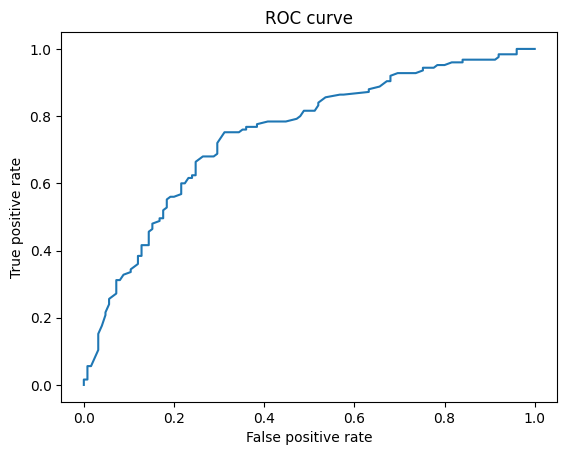

In [77]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# Exercise 2. Multivariate Regression

---

### About the data

The goal of this dataset is to predict total energy usage in kWh of a house. This dataset contains 138 time series obtained from the Appliances Energy Prediction dataset from the UCI repository. The time series has 24 dimensions. This includes temperature and humidity measurements of 9 rooms in a house, monitored with a ZigBee wireless sensor network. It also includes weather and climate data such as temperature, pressure, humidity, wind speed, visibility and dewpoint measured from Chievres airport. The data set is averaged for 10 minutes period and spanning 4.5 months.

### Load the data

Load the numpy files X_train_AppliancesEnergy.npy, X_test_AppliancesEnergy.npy, y_train_AppliancesEnergy.npy, y_test_AppliancesEnergy.npy

In [78]:
X_train = np.load('data/X_train_AppliancesEnergy.npy')
X_test = np.load('data/X_test_AppliancesEnergy.npy')
y_train = np.load('data/y_train_AppliancesEnergy.npy')
y_test = np.load('data/y_test_AppliancesEnergy.npy')
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((95, 24, 144), (42, 24, 144), (95,), (42,))

## Data Understanding/Preparation

similar to the previous exercise, try to understand the data first!

In [79]:
# missing values
np.isnan(X_train).ravel().sum(), np.isnan(X_test).ravel().sum()

(np.int64(0), np.int64(0))

<Axes: >

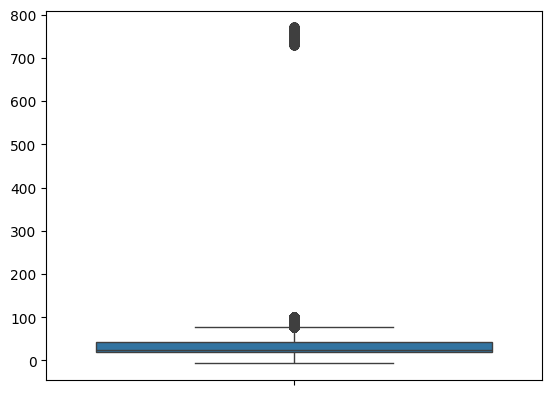

In [80]:
# outliers
sns.boxplot(X_train.ravel())
# there are some outliers but they are not that extreme

## Regression
After you removed the main problems in the data, you can start the regression process. Similar to the previous exercise, you can use any regressor you saw in the course up to now. Find the best model in terms of MAE. As metric use `neg_mean_absolute_error` in the cross_val_score function (higher is better).

In [81]:
from sklearn.model_selection import cross_val_score

### Dummy Regressor

In [82]:
from sktime.regression.dummy import DummyRegressor

In [83]:
dummy = DummyRegressor()

In [84]:
cross_val_score(dummy, X_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()

np.float64(-3.537271468144044)

### KNN

#### Euclidean

In [85]:
from sktime.regression.distance_based import KNeighborsTimeSeriesRegressor
from sklearn.model_selection import GridSearchCV
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = TabularToSeriesAdaptor(StandardScaler(), fit_in_transform=True)

In [87]:
param_grid = {
    "kneighborstimeseriesregressor__n_neighbors": [1, 3, 5, 7, 9],
    "kneighborstimeseriesregressor__distance": ["euclidean"]
}

In [88]:
grid_search = GridSearchCV(scaler * KNeighborsTimeSeriesRegressor(), param_grid, cv=5, scoring="neg_mean_absolute_error")

In [89]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RegressorPipeline(regressor=KNeighborsTimeSeriesRegressor(),
                  transformers=[TabularToSeriesAdaptor(fit_in_transform=True,
                                                       transformer=StandardScaler())]),
             param_grid={'kneighborstimeseriesregressor__distance': ['euclidean'],
                         'kneighborstimeseriesregressor__n_neighbors': [1, 3, 5,
                                                                        7, 9]},
             scoring='neg_mean_absolute_error')

In [90]:
grid_search.best_params_

{'kneighborstimeseriesregressor__distance': 'euclidean',
 'kneighborstimeseriesregressor__n_neighbors': 1}

In [91]:
grid_search.best_score_

np.float64(-4.091263157894736)

#### DTW

In [92]:
knn = KNeighborsTimeSeriesRegressor(n_neighbors=7, distance="dtw", distance_params={"window": 0.1})

In [93]:
cross_val_score(knn, X_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()

np.float64(-3.593157894736842)

In [94]:
cross_val_score(scaler * knn, X_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()

np.float64(-3.4659999999999997)

### Feature Extraction

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
from sktime.transformations.panel.catch22 import Catch22

In [97]:
pipe = scaler * Catch22() * RandomForestRegressor()

In [98]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()

np.float64(-2.949789824561402)

In [99]:
pipe = Catch22() * RandomForestRegressor()

In [100]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()

KeyboardInterrupt: 

In [ ]:
# not normalizing is better in this case

#### hyperparameter tuning

In [ ]:
param_grid = {
    "catch22__catch24": [True, False],
}

In [ ]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring="neg_mean_absolute_error")

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SklearnRegressorPipeline(regressor=RandomForestRegressor(),
                         transformers=[Catch22()]),
             param_grid={'catch22__catch24': [True, False]},
             scoring='neg_mean_absolute_error')

In [ ]:
grid_search.best_params_

{'catch22__catch24': True}

In [ ]:
grid_search.best_score_

-1.8143126315789473

### Evaluation
let's train the best model on the whole training set and evaluate it on the test set

In [ ]:
pipe = Catch22(catch24=False) * RandomForestRegressor()

In [ ]:
pipe.fit(X_train, y_train)

SklearnRegressorPipeline(regressor=RandomForestRegressor(),
                         transformers=[Catch22()])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_pred)

1.9770857142857132